# Target Premium Prediction

  ### Life Cycle of Machine Learning Project
      . Understanding the problem statement
      . Data collection
      . Data check to perform
      . Exploratory data analysis
      . Data pre-processing
      . Model training
      . Choose the best model

#### 1) Problem Statement:
  This Project understand how the prediction perform on premium is affected by other Independent  
  variables  like age,sex,bmi,How many childrens have , smoker ,region .

#### 2)Data collection
1. Data Source- __https://www.kaggle.com/datasets/vivekbaaganps/insurence__
2. The data consist of 7 features and 52k rows

##### 2.1 Import Data and Required Packages
Importing Pandas , Numpy , Matplotlib , warnings Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Load the excel data as Data Frame

In [25]:
data=pd.read_excel("D:\Python\EDA\Insurence.xlsx")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


##### 2.2 Data Information
* Gender of the Insured -> (Male/Female)
* sex: Gender of the individual (male or female) 
* age: Age of the individual (in years)
* bmi: Body Mass Index (BMI) of the individual, which is a measure of body fat based on height and weight (numeric)
* children: Number of children/dependents covered by the insurance plan.
* smoker: Indicates whether the individual is a smoker or not (yes or no).
* region: Geographic region where the individual resides (e.g., southwest, southeast, northwest).
* expenses: Medical insurance expenses incurred by the individual (numeric).



#### 3.Data check to perform
* Check missing Values 
* Check Duplicates 
* Check Data Types
* Check the Unique values for each column
* Check Stats od data set


##### 3.1 Check Missing Values

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

 Observation:There is no missing values from the data

##### 3.2 Checking duplicates values

In [9]:
data.duplicated().sum()


1

 Observation : Found 1 duplicate from data (52k)

In [12]:
data.drop_duplicates(inplace=True)


##### 3.3 Check data types

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### 3.4 checking unique values for each feature

In [22]:
data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

##### 3.5 check stats of the dataset 

In [26]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


#### Insights
* From above descriptive stats , avg age of insured is 39 years and Min - max between 14 to 64.
* Avg 1 child covered by the insurence plan.

#### 4)Data pre-processing perform on below data points
* Sex
* Smoker
* region

In [19]:
data['sex']=data['sex'].map({'male':1,'female':0})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,'northeast':3,'northwest':4})
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,4,21984.47
4,32,1,28.9,0,0,4,3866.86


## 5) Model Training
5.1 Preparing X and Y variables

In [28]:
x=data.drop(['expenses'],axis=1)
y=data['expenses']

In [29]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,4
4,32,1,28.9,0,0,4
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,4
1334,18,0,31.9,0,0,3
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,1


5.2 Separate dataset into train and test

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

5.3 Train the dataset on different models

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

5.4 Difference between Actual , Predicted Values and plot the graphs to evaluate the performance

In [39]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})
df1

,Actual,lr,svm,rf,gr
764,9095.07,8634.651620,9548.245459,9629.4720,11124.066177
887,5272.18,7272.158295,9492.603021,5572.8507,5766.642095
890,29330.98,37089.791631,9648.676289,28444.6308,29920.244600
1293,9301.89,9660.877717,9555.038509,10918.7036,10125.898685
259,33750.29,27177.253205,9420.583782,34524.5379,33952.980672
...,...,...,...,...,...
109,47055.53,39152.253697,9648.921467,46851.5656,45537.934690
575,12222.90,11991.013752,9625.389781,12211.1251,12557.636830
535,6067.13,7327.750607,9504.084924,6243.6090,6676.563720
543,63770.43,40956.200662,9605.044543,47132.7070,48154.738571


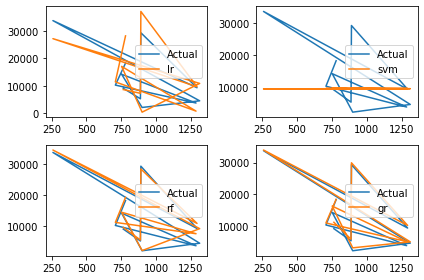

In [48]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
 

plt.tight_layout()
plt.legend()

### Evaluate the metrics

In [49]:
from sklearn import metrics

In [50]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

print(score1,score2,score3,score4)

0.7826697046572233 -0.07229728898041587 0.8596703585862437 0.8785460658282713


In [51]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [52]:
print(s1,s2,s3,s4)

4197.296302843933 8592.44298662583 2554.3933094776116 2443.825280382213


In [53]:
gr=GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

### Conclusion:
* The <font color=red>GradientBoostingRegressor</font> has demonstrated a strong R2 score:<font color=red>87%</font> for the given use case.